In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.cluster import SpectralClustering as SC

data = pandas.DataFrame(data = pandas.read_csv('/Users/mchen/Documents/Social Tribes/similarity-updated.csv', header = None))
data.head()
data

,0,1,2,3,4,5,6,7,8,9,...,396,397,398,399,400,401,402,403,404,405
0,1.000000,0.154615,0.128242,0.117036,0.096753,0.106672,0.216381,0.105924,0.244316,0.242717,...,0.080793,0.195271,0.106780,0.287842,0.079860,0.139011,0.176458,0.036928,0.207757,0.293838
1,0.154615,1.000000,0.096306,0.063149,0.057980,0.082548,0.126921,0.082246,0.185646,0.115409,...,0.064670,0.131949,0.115271,0.177713,0.045531,0.082933,0.115422,0.021049,0.176515,0.116874
2,0.128242,0.096306,1.000000,0.096306,0.074620,0.114210,0.257796,0.084923,0.113493,0.225923,...,0.055419,0.110993,0.083623,0.178426,0.097085,0.126835,0.145613,0.051699,0.133769,0.155928
3,0.117036,0.063149,0.096306,1.000000,0.063622,0.090841,0.116372,0.086262,0.078547,0.085417,...,0.064317,0.117952,0.074103,0.098842,0.103589,0.090239,0.109755,0.036189,0.149799,0.063875
4,0.096753,0.057980,0.074620,0.063622,1.000000,0.118357,0.127003,0.055388,0.085349,0.129044,...,0.054978,0.083128,0.060337,0.105096,0.068538,0.087177,0.117711,0.035451,0.092469,0.146810
5,0.106672,0.082548,0.114210,0.090841,0.118357,1.000000,0.214474,0.064455,0.088579,0.177535,...,0.057294,0.113456,0.107426,0.108933,0.106672,0.135319,0.114587,0.017339,0.143611,0.199397
6,0.216381,0.126921,0.257796,0.116372,0.127003,0.214474,1.000000,0.172189,0.146099,0.192647,...,0.108370,0.274846,0.169690,0.212533,0.195736,0.251374,0.224305,0.066839,0.338760,0.147386
7,0.105924,0.082246,0.084923,0.086262,0.055388,0.064455,0.172189,1.000000,0.112533,0.171268,...,0.036740,0.096720,0.064173,0.167503,0.058299,0.089776,0.085777,0.033973,0.110525,0.140228
8,0.244316,0.185646,0.113493,0.078547,0.085349,0.088579,0.146099,0.112533,1.000000,0.148681,...,0.105110,0.200406,0.175801,0.232971,0.061792,0.097683,0.181253,0.040990,0.204803,0.201441
9,0.242717,0.115409,0.225923,0.085417,0.129044,0.177535,0.192647,0.171268,0.148681,1.000000,...,0.136740,0.235284,0.209186,0.238380,0.159600,0.270229,0.302125,0.095273,0.326251,0.180527


0.236804843232
coordinate:
 0      0.128242
1      0.096306
2      1.000000
3      0.096306
4      0.074620
5      0.114210
6      0.257796
7      0.084923
8      0.113493
9      0.225923
10     0.047574
11     0.049787
12     0.182864
13     0.181676
14     0.125136
15     0.107306
16     0.050809
17     0.169864
18     0.095558
19     0.192175
20     0.146928
21     0.075504
22     0.192050
23     0.118805
24     0.206175
25     0.197675
26     0.156678
27     0.203425
28     0.215924
29     0.127910
         ...   
376    0.040018
377    0.147116
378    0.127180
379    0.116044
380    0.205934
381    0.098806
382    0.099304
383    0.204812
384    0.215432
385    0.041686
386    0.128840
387    0.203737
388    0.145366
389    0.231548
390    0.148405
391    0.130054
392    0.142564
393    0.003375
394    0.085046
395    0.147366
396    0.055419
397    0.110993
398    0.083623
399    0.178426
400    0.097085
401    0.126835
402    0.145613
403    0.051699
404    0.133769
405    0.155

Name: 13, Length: 406, dtype: float64 label: 1
coordinate:
 0      0.159672
1      0.115333
2      0.125136
3      0.108413
4      0.091690
5      0.115718
6      0.229769
7      0.109270
8      0.172871
9      0.266355
10     0.057519
11     0.057704
12     0.259179
13     0.239380
14     1.000000
15     0.133081
16     0.053886
17     0.196322
18     0.083573
19     0.198696
20     0.168834
21     0.071662
22     0.214263
23     0.163068
24     0.258922
25     0.261998
26     0.190107
27     0.271481
28     0.296790
29     0.161359
         ...   
376    0.052057
377    0.192350
378    0.129557
379    0.143516
380    0.218335
381    0.091497
382    0.098180
383    0.211664
384    0.198370
385    0.043340
386    0.132174
387    0.209650
388    0.206510
389    0.280259
390    0.154578
391    0.150830
392    0.192823
393    0.003973
394    0.077725
395    0.174409
396    0.071013
397    0.121548
398    0.103242
399    0.251682
400    0.105758
401    0.144577
402    0.176785
403    0.056

 0      0.148818
1      0.068825
2      0.117243
3      0.046231
4      0.080127
5      0.235582
6      0.137272
7      0.107848
8      0.081679
9      0.113449
10     0.055503
11     0.075594
12     0.126488
13     0.104566
14     0.132889
15     0.116352
16     0.017418
17     0.150655
18     0.067753
19     0.298044
20     0.165130
21     0.274928
22     0.099701
23     0.043853
24     0.135554
25     0.083059
26     0.104078
27     0.118446
28     0.089327
29     0.112657
         ...   
376    0.043362
377    0.092522
378    0.130174
379    0.097802
380    0.162090
381    0.134958
382    0.148394
383    0.229785
384    0.306341
385    0.052551
386    0.167659
387    0.187889
388    0.080320
389    0.066046
390    0.087449
391    0.047650
392    0.149259
393    0.004372
394    0.086736
395    0.138681
396    0.067753
397    0.177719
398    0.095008
399    0.092034
400    0.117923
401    0.136297
402    0.133406
403    0.044313
404    0.199774
405    0.081821
Name: 38, Length: 406, 

Name: 117, Length: 406, dtype: float64 label: 1
coordinate:
 0      0.223527
1      0.135824
2      0.208112
3      0.117853
4      0.123822
5      0.156050
6      0.323353
7      0.160977
8      0.190824
9      0.274088
10     0.078350
11     0.132384
12     0.229129
13     0.289059
14     0.243352
15     0.146091
16     0.048029
17     0.280412
18     0.089805
19     0.282700
20     0.184431
21     0.121422
22     0.300647
23     0.181618
24     0.461529
25     0.239706
26     0.238647
27     0.230618
28     0.274559
29     0.172331
         ...   
376    0.061309
377    0.154794
378    0.270062
379    0.174066
380    0.325066
381    0.199409
382    0.227252
383    0.344602
384    0.404380
385    0.051016
386    0.160038
387    0.241941
388    0.215500
389    0.234559
390    0.208076
391    0.151147
392    0.261203
393    0.003941
394    0.112644
395    0.251132
396    0.156828
397    0.258028
398    0.163901
399    0.306176
400    0.160684
401    0.226397
402    0.234223
403    0.07

coordinate:
 0      0.112477
1      0.083994
2      0.110759
3      0.102828
4      0.083003
5      0.278553
6      0.277029
7      0.084086
8      0.088025
9      0.237576
10     0.069480
11     0.062195
12     0.158472
13     0.228390
14     0.113468
15     0.132963
16     0.060005
17     0.250859
18     0.100352
19     0.342539
20     0.237179
21     0.126033
22     0.263349
23     0.100780
24     0.263019
25     0.199841
26     0.213389
27     0.196801
28     0.279474
29     0.143698
         ...   
376    0.051053
377    0.183651
378    0.151930
379    0.131868
380    0.221435
381    0.146445
382    0.162660
383    0.310949
384    0.338172
385    0.057393
386    0.197190
387    0.243656
388    0.149154
389    0.284100
390    0.115741
391    0.191713
392    0.168631
393    0.004692
394    0.109547
395    0.200899
396    0.056211
397    0.138184
398    0.093180
399    0.158274
400    0.162732
401    0.148890
402    0.150845
403    0.033235
404    0.166204
405    0.182131
Name: 254, 

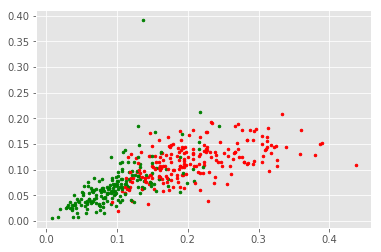

In [6]:
array = data.values

#KMeans
km = KMeans(n_clusters = 2, random_state = 0)
kmeans = km.fit(array)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["g.", "r."]

print(metrics.silhouette_score(data, kmeans.labels_,
                                      metric='euclidean'))

for x in range(len(data)):
    if(data[x][0] != 1.0 and data[x][1] != 1.0):
        print("coordinate:\n", data[x], "label:", labels[x])
        plt.plot(data[x][0], data[x][1], colors[labels[x]], markersize = 5)
    
#plt.scatter(centroids[0], centroids[1], marker = "x", s = 25, linewidths = 5, zorder = 10)

plt.show()